## Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import nltk

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
from wordcloud import WordCloud,STOPWORDS

# import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Model Training

#### Train Test Split

In [2]:
# Read Processed Comments:
from scipy.sparse import csr_matrix
def load_sparse_csr(filename):
    # here we need to add .npz extension manually
    loader = np.load(filename + '.npz')
    return csr_matrix((loader['data'], loader['indices'], loader['indptr']),
                      shape=loader['shape'])
X = load_sparse_csr('word_count')
X

<50000x70847 sparse matrix of type '<class 'numpy.int64'>'
	with 4637943 stored elements in Compressed Sparse Row format>

In [3]:
# train_test_split
from sklearn.model_selection import train_test_split
y = pd.read_csv('sentiment', header=None).to_numpy().flatten()

#y must be a dense vector
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state = 1) 

#### K Nearest Neighbors Without PCA

In [4]:
# Logistic Regression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':[50,100,150,200,250,300]}
gs = GridSearchCV(estimator = KNeighborsClassifier(),
               param_grid = param_grid,
               refit = True,
               cv=5)
gs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [50, 100, 150, 200, 250, 300]})

In [5]:
print(gs.best_params_)
print(gs.best_score_)

{'n_neighbors': 200}
0.7209714285714286


In [6]:
param_grid2 = {'n_neighbors':[160,180,200,220,240]}
gs2 = GridSearchCV(estimator = KNeighborsClassifier(),
               param_grid = param_grid2,
               refit = True,
               cv=5)
gs2.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [160, 180, 200, 220, 240]})

In [7]:
print(gs2.best_params_)
print(gs2.best_score_)

{'n_neighbors': 180}
0.7222


In [8]:
param_grid3 = {'n_neighbors':[170,175,180,185,190]}
gs3 = GridSearchCV(estimator = KNeighborsClassifier(),
               param_grid = param_grid3,
               refit = True,
               cv=5)
gs3.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [170, 175, 180, 185, 190]})

In [9]:
print(gs3.best_params_)
print(gs3.best_score_)

{'n_neighbors': 180}
0.7222


In [10]:
param_grid4 = {'n_neighbors':[176,177,178,179,180,181,182,183,184]}
gs4 = GridSearchCV(estimator = KNeighborsClassifier(),
               param_grid = param_grid4,
               refit = True,
               cv=5)
gs4.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [176, 177, 178, 179, 180, 181, 182, 183,
                                         184]})

In [11]:
print(gs4.best_params_)
print(gs4.best_score_)

{'n_neighbors': 182}
0.7224


[0.71282857 0.72005714 0.72062857 0.72097143 0.71771429 0.71328571
 0.72014286 0.7222     0.72097143 0.72017143 0.71805714 0.72008571
 0.71788571 0.7222     0.718      0.72091429 0.72194286 0.71808571
 0.72197143 0.71814286 0.7222     0.71808571 0.7224     0.71854286
 0.72165714]


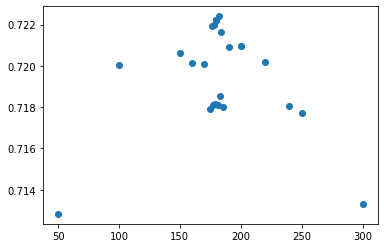

In [13]:
from matplotlib.pyplot import scatter

scoreList1 = gs.cv_results_['mean_test_score']
scoreList2 = gs2.cv_results_['mean_test_score']
scoreList3 = gs3.cv_results_['mean_test_score']
scoreList4 = gs4.cv_results_['mean_test_score']
scores = np.concatenate((scoreList1,scoreList2,scoreList3,scoreList4),axis = 0)
n_neighbors =  np.concatenate(([50, 100, 150, 200, 250, 300],
                              [160,180,200,220,240],
                              [170,175,180,185,190],
                              [176, 177, 178, 179, 180, 181, 182, 183,
                                         184]),axis = 0)
print(scores)
scatter(n_neighbors, scores)

In [14]:
dir(gs4)
gs4.best_estimator_.score(X_test,y_test)

0.7289333333333333

In [15]:
y_predict = gs4.predict(X_test)

In [16]:
np.savetxt('y_predict_knn', y_predict,)

(4418, 984, 3082, 6516)


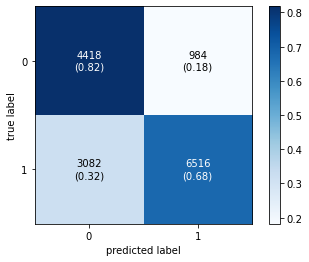

In [17]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_predict, y_test).ravel()
print(str((tn, fp, fn, tp)))

cm = np.array([[tn,fp],
              [fn, tp]])

fig, ax = plot_confusion_matrix(conf_mat = cm,
                                show_absolute=True,
                                show_normed = True,
                                colorbar = True)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    fig, ax = plt.subplots(figsize = (10,8))
    ax.set_title(title, fontsize = 20)
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("Training examples", fontsize = 16)
    

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    print(train_sizes)

    # Plot learning curve
    ax.grid()
    ax.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    ax.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    ax.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    ax.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    ax.legend(loc="best")
    ax.set_ylabel("Exaplined Variance", fontsize = 16)

    return plt




title = "KNN"
estimator = KNeighborsClassifier()
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=1)

plot_learning_curve(estimator, title, X, y, ylim=(0.5, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

# Compute ROC curve and ROC area 
fpr = dict()
tpr = dict()
roc_auc = dict()
y_score = gs4.fit(X_train, y_train).predict(X_test)


fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.5f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for KNN')
plt.legend(loc="lower right")
plt.show()